In [62]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import re
import json
from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# read file for nike stock prices for 2020
prices = pd.read_csv  ('Nike_2017_20.csv')

# read file for all tweets containing $NKE
with open ('results_2017_20.json', 'r') as fp:
    data = json.load (fp)
    
tweets = pd.DataFrame (data.items (), columns = ['Date', 'Tweets'])

In [4]:
# merge our two data frames
merge = prices.merge (tweets, how = 'inner', on = 'Date', left_index = True)

In [5]:
# get the subjectivity score of a tweet
def getSubjectivity (tweet):
    return TextBlob (tweet).sentiment.subjectivity

# get the polarity score of a tweet
def getPolarity (tweet):
    return TextBlob (tweet).sentiment.polarity

In [6]:
# add columns to df
merge ['Subjectivity'] = merge ['Tweets'].apply (getSubjectivity)
merge ['Polarity']     = merge ['Tweets'].apply (getPolarity)

In [7]:
# drop columns 
merge = merge.drop ('month', axis = 1)
merge = merge.drop ('day',   axis = 1)
merge = merge.drop ('year',  axis = 1)
merge

,Date,Close-Last,Volume,Open,High,Low,Tweets,Subjectivity,Polarity
1,2020-12-31,141.47,2949915,141.70,141.790,140.3700,"I'm buried deep in options today, setting up s...",0.454151,0.172573
2,2020-12-30,141.58,3052122,142.16,142.610,140.6600,Hoy @EdgarcOchoa analiza #Nike $NKE a través d...,0.420909,0.141294
3,2020-12-29,141.57,3232430,142.83,143.060,140.4300,Best and worst-performing Dow Jones so far tod...,0.431961,0.100175
4,2020-12-28,142.43,4081534,142.54,142.920,141.0438,Air Jordan owner Nike wanted to secure its fir...,0.469610,0.086641
8,2020-12-24,141.60,1821900,141.10,142.190,141.1000,$AMD $SPY $BABA $GHSI $AAPL $FB $XL $OCGN $NKE...,0.428174,0.123514
...,...,...,...,...,...,...,...,...,...
1453,2017-01-09,53.38,8823213,53.96,53.990,53.2150,No matter who takes home college football's na...,0.467484,0.144779
1456,2017-01-06,53.91,12526190,53.09,54.090,52.9800,#FelizViernes !!!! #idea de #trade en #Accione...,0.473160,0.048087
1457,2017-01-05,53.06,8673284,52.92,53.100,52.4400,.@JimCramer says mall traffic is the real issu...,0.452630,0.122281
1458,2017-01-04,53.07,13686230,52.23,53.345,52.0900,$NKE best $DIA gainer so far after being worst...,0.512226,0.177342


In [8]:
# get sentiment score for a tweet
def SIA (tweet):
    sia = SentimentIntensityAnalyzer ()
    sentiment = sia.polarity_scores (tweet)
    return sentiment

In [9]:
pos, neu, neg, compound = [], [], [], []

# get sentiment scores for all tweets
for tweet in merge['Tweets']:
    sentiments = SIA (tweet)
    pos.append (sentiments['pos'])
    neu.append (sentiments['neu'])
    neg.append (sentiments['neg'])
    compound.append (sentiments['compound'])


In [10]:
# add columns to df
merge ["Positive"] = pos
merge ["Neutral"]  = neu
merge ["Negative"] = neg
merge ["Compound"] = compound

merge

,Date,Close-Last,Volume,Open,High,Low,Tweets,Subjectivity,Polarity,Positive,Neutral,Negative,Compound
1,2020-12-31,141.47,2949915,141.70,141.790,140.3700,"I'm buried deep in options today, setting up s...",0.454151,0.172573,0.059,0.908,0.033,0.9884
2,2020-12-30,141.58,3052122,142.16,142.610,140.6600,Hoy @EdgarcOchoa analiza #Nike $NKE a través d...,0.420909,0.141294,0.056,0.914,0.030,0.9905
3,2020-12-29,141.57,3232430,142.83,143.060,140.4300,Best and worst-performing Dow Jones so far tod...,0.431961,0.100175,0.074,0.882,0.043,0.9933
4,2020-12-28,142.43,4081534,142.54,142.920,141.0438,Air Jordan owner Nike wanted to secure its fir...,0.469610,0.086641,0.058,0.926,0.016,0.9897
8,2020-12-24,141.60,1821900,141.10,142.190,141.1000,$AMD $SPY $BABA $GHSI $AAPL $FB $XL $OCGN $NKE...,0.428174,0.123514,0.081,0.885,0.034,0.9970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2017-01-09,53.38,8823213,53.96,53.990,53.2150,No matter who takes home college football's na...,0.467484,0.144779,0.091,0.883,0.026,0.9951
1456,2017-01-06,53.91,12526190,53.09,54.090,52.9800,#FelizViernes !!!! #idea de #trade en #Accione...,0.473160,0.048087,0.069,0.909,0.022,0.9958
1457,2017-01-05,53.06,8673284,52.92,53.100,52.4400,.@JimCramer says mall traffic is the real issu...,0.452630,0.122281,0.085,0.881,0.034,0.9973
1458,2017-01-04,53.07,13686230,52.23,53.345,52.0900,$NKE best $DIA gainer so far after being worst...,0.512226,0.177342,0.096,0.872,0.032,0.9990


In [12]:
label = []
for open_val, close_val in zip (merge["Open"], merge["Close-Last"]):
    if (close_val > open_val):
        label.append (1)
    else:
        label.append (0)
        
merge ["Label"] = label

In [192]:
df = merge [["Open", "High", "Low", "Subjectivity", "Polarity", "Positive", "Neutral", "Negative", "Compound", "Label"]]
df

,Open,High,Low,Subjectivity,Polarity,Positive,Neutral,Negative,Compound,Label
1,141.70,141.790,140.3700,0.454151,0.172573,0.059,0.908,0.033,0.9884,0
2,142.16,142.610,140.6600,0.420909,0.141294,0.056,0.914,0.030,0.9905,0
3,142.83,143.060,140.4300,0.431961,0.100175,0.074,0.882,0.043,0.9933,0
4,142.54,142.920,141.0438,0.469610,0.086641,0.058,0.926,0.016,0.9897,0
8,141.10,142.190,141.1000,0.428174,0.123514,0.081,0.885,0.034,0.9970,1
...,...,...,...,...,...,...,...,...,...,...
1453,53.96,53.990,53.2150,0.467484,0.144779,0.091,0.883,0.026,0.9951,0
1456,53.09,54.090,52.9800,0.473160,0.048087,0.069,0.909,0.022,0.9958,1
1457,52.92,53.100,52.4400,0.452630,0.122281,0.085,0.881,0.034,0.9973,1
1458,52.23,53.345,52.0900,0.512226,0.177342,0.096,0.872,0.032,0.9990,1


In [193]:
# Features
X = df.drop ('Label', axis = 1)
X


,Open,High,Low,Subjectivity,Polarity,Positive,Neutral,Negative,Compound
1,141.70,141.790,140.3700,0.454151,0.172573,0.059,0.908,0.033,0.9884
2,142.16,142.610,140.6600,0.420909,0.141294,0.056,0.914,0.030,0.9905
3,142.83,143.060,140.4300,0.431961,0.100175,0.074,0.882,0.043,0.9933
4,142.54,142.920,141.0438,0.469610,0.086641,0.058,0.926,0.016,0.9897
8,141.10,142.190,141.1000,0.428174,0.123514,0.081,0.885,0.034,0.9970
...,...,...,...,...,...,...,...,...,...
1453,53.96,53.990,53.2150,0.467484,0.144779,0.091,0.883,0.026,0.9951
1456,53.09,54.090,52.9800,0.473160,0.048087,0.069,0.909,0.022,0.9958
1457,52.92,53.100,52.4400,0.452630,0.122281,0.085,0.881,0.034,0.9973
1458,52.23,53.345,52.0900,0.512226,0.177342,0.096,0.872,0.032,0.9990


In [194]:
# Target 
Y = np.array (df["Label"])
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [195]:
# 90-10 Training-test split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.1, random_state = 0)

In [196]:
# create and train our model
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [198]:
# predict on testing data
predictions = model.predict (x_test)

# check accuracy
print (classification_report (y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        51
           1       0.83      0.86      0.84        50

    accuracy                           0.84       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.84      0.84      0.84       101

101


In [121]:
dates = merge["Date"][-len(predictions):]
dates = dates.to_frame ()
dates["Predictions"] = predictions
dates["Targets"]     = y_test
dates

,Date,Predictions,Targets
1170,2017-10-19,1,1
1171,2017-10-18,1,1
1172,2017-10-17,0,0
1173,2017-10-16,0,1
1176,2017-10-13,0,0
...,...,...,...
1453,2017-01-09,1,1
1456,2017-01-06,1,1
1457,2017-01-05,1,0
1458,2017-01-04,0,0


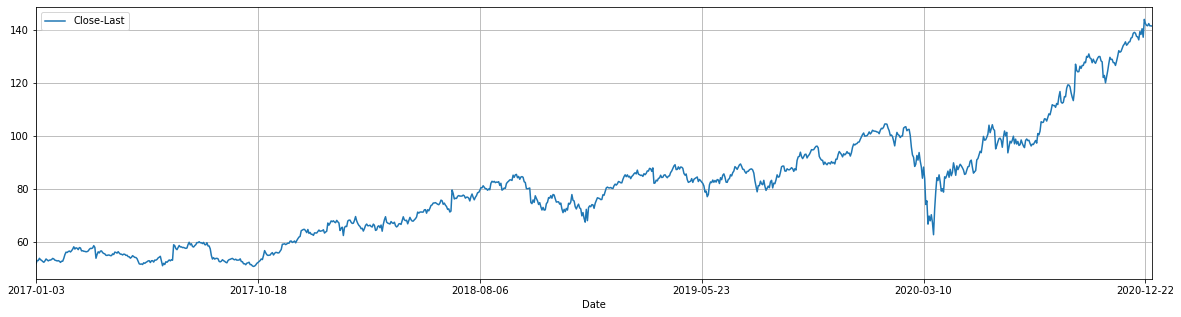

In [199]:
reversed_df = merge.iloc[::-1]
reversed_df[0:].plot(x='Date', y=['Close-Last'], figsize=(20,5), grid=True)